What kinds of games are most popular to play?
As an indie game developer, I would like to research the existed games online in the most popular gaming platform, Steam.
What genres of the games are most popular? 
Metrics:
Positive rate percentage
Owners

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('C:/Users/rache/Desktop/UK work/Portfolio projects/game project/steam.csv')

In [3]:
df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
df.shape

(27075, 18)

In [5]:
df.categories

0        Multi-player;Online Multi-Player;Local Multi-P...
1        Multi-player;Online Multi-Player;Local Multi-P...
2                    Multi-player;Valve Anti-Cheat enabled
3        Multi-player;Online Multi-Player;Local Multi-P...
4        Single-player;Multi-player;Valve Anti-Cheat en...
                               ...                        
27070                     Single-player;Steam Achievements
27071                                        Single-player
27072    Single-player;Multi-player;Co-op;Shared/Split ...
27073                            Single-player;Steam Cloud
27074                            Single-player;Steam Cloud
Name: categories, Length: 27075, dtype: object

In [6]:
df.steamspy_tags

0              Action;FPS;Multiplayer
1              Action;FPS;Multiplayer
2        FPS;World War II;Multiplayer
3              Action;FPS;Multiplayer
4                   FPS;Action;Sci-fi
                     ...             
27070          Adventure;Indie;Casual
27071          Action;Indie;Adventure
27072             Action;Indie;Casual
27073          Indie;Casual;Adventure
27074          Indie;Casual;Adventure
Name: steamspy_tags, Length: 27075, dtype: object

In [7]:
# Check null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [8]:
# Check duplicated values
df.duplicated().sum()

0

<AxesSubplot:xlabel='price'>

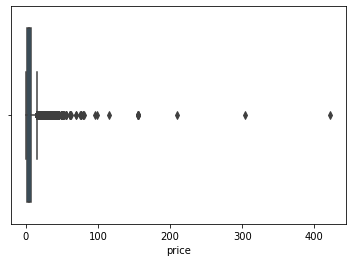

In [9]:
sns.boxplot(x=df.price)

In [10]:
# drop the unnecessary columns
df = df.drop(['appid','developer','publisher','genres','platforms'], axis=1)

Data Transformation

In [11]:
# transfer release date to year
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

df = df.drop('release_date', axis=1)

In [12]:
# In categories, find multi-player and single-player 
df['style'] = ""

for i in range(len(df)):
    if "Multi-player" in df['categories'][i]:
        df.at[i, 'style'] = "Multiplayer"
    elif "Single-player" in df['categories'][i]:
        df.at[i, 'style'] = "Singleplayer"

df = df.drop('categories', axis=1)

In [13]:
# In steamspy_tags, find indie tag
df['Indie'] = ""

for i in range(len(df)):
    if "Indie" in df['steamspy_tags'][i]:
        df.at[i, 'Indie'] = 1
    else:
        df.at[i, 'Indie'] = 0

df['Indie'] = df['Indie'].astype(int)

df = df.drop('steamspy_tags', axis=1)

In [14]:
# split the tags column
# df['steamspy_tags'] = df['steamspy_tags'].str.split(';')

In [15]:
# calculate the positive rate percentage and total ratings
df['positive_rate_pct'] = round(df['positive_ratings'] / (df['positive_ratings'] + df['negative_ratings']) , 2)
df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']

df = df.drop(['negative_ratings'], axis=1)

In [16]:
df.owners.unique()

array(['10000000-20000000', '5000000-10000000', '2000000-5000000',
       '20000000-50000000', '100000000-200000000', '50000000-100000000',
       '20000-50000', '500000-1000000', '100000-200000', '50000-100000',
       '1000000-2000000', '200000-500000', '0-20000'], dtype=object)

In [17]:
# rewrite the column owners, to make it more clearly
df['owners'] = df['owners'].replace({'0-20000': '0-20k', 
                                    '20000-50000': '20k-50k',
                                    '50000-100000': '50k-100k',
                                    '100000-200000': '100k-200k',
                                    '200000-500000': '200k-500k',
                                    '500000-1000000': '500k-1m',
                                    '1000000-2000000': '1m-2m',
                                    '2000000-5000000': '2m-5m',
                                    '5000000-10000000': '5m-10m',
                                    '10000000-20000000': '10m-20m',
                                    '20000000-50000000': '20m-50m',
                                    '50000000-100000000': '50m-100m',
                                    '100000000-200000000': '100m-200m'})

In [18]:
df

,name,english,required_age,achievements,average_playtime,median_playtime,owners,price,year,style,Indie,positive_rate_pct,total_ratings
0,Counter-Strike,1,0,0,17612,317,10m-20m,7.19,2000,Multiplayer,0,0.97,127873
1,Team Fortress Classic,1,0,0,277,62,5m-10m,3.99,1999,Multiplayer,0,0.84,3951
2,Day of Defeat,1,0,0,187,34,5m-10m,3.99,2003,Multiplayer,0,0.90,3814
3,Deathmatch Classic,1,0,0,258,184,5m-10m,3.99,2001,Multiplayer,0,0.83,1540
4,Half-Life: Opposing Force,1,0,0,624,415,5m-10m,3.99,1999,Multiplayer,0,0.95,5538
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,Room of Pandora,1,0,7,0,0,0-20k,2.09,2019,Singleplayer,1,1.00,3
27071,Cyber Gun,1,0,0,0,0,0-20k,1.69,2019,Singleplayer,1,0.89,9
27072,Super Star Blast,1,0,24,0,0,0-20k,3.99,2019,Multiplayer,1,0.00,1
27073,New Yankee 7: Deer Hunters,1,0,0,0,0,0-20k,5.19,2019,Singleplayer,1,1.00,2


In [18]:
# Assume: total rating is the total user; calcuate the game revenue
df['revenue'] = df['price'] *df['total_ratings']

Draw graphs

In [19]:
df.head(5)

,name,english,required_age,achievements,positive_ratings,average_playtime,median_playtime,owners,price,year,style,Indie,positive_rate_pct,total_ratings,revenue
0,Counter-Strike,1,0,0,124534,17612,317,10m-20m,7.19,2000,Multiplayer,0,0.97,127873,919406.87
1,Team Fortress Classic,1,0,0,3318,277,62,5m-10m,3.99,1999,Multiplayer,0,0.84,3951,15764.49
2,Day of Defeat,1,0,0,3416,187,34,5m-10m,3.99,2003,Multiplayer,0,0.90,3814,15217.86
3,Deathmatch Classic,1,0,0,1273,258,184,5m-10m,3.99,2001,Multiplayer,0,0.83,1540,6144.60
4,Half-Life: Opposing Force,1,0,0,5250,624,415,5m-10m,3.99,1999,Multiplayer,0,0.95,5538,22096.62


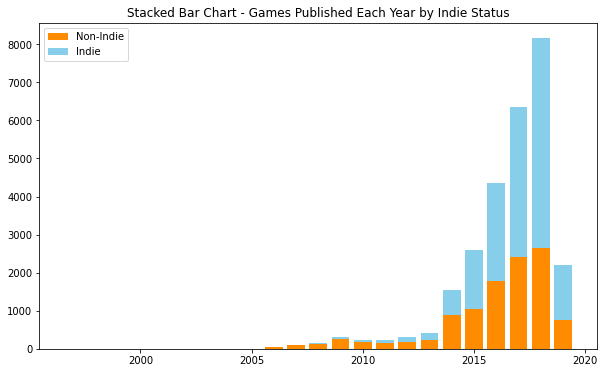

In [20]:
# games published every year

# Count the number of games published each year and by indie status
yearly_counts = df.groupby(['year', 'Indie']).size().unstack(fill_value=0)


# Plot a stacked bar chart
plt.figure(figsize=(10, 6))
indie_labels = ['Non-Indie', 'Indie']

plt.bar(yearly_counts.index, yearly_counts[0], color='darkorange', label=indie_labels[0])
plt.bar(yearly_counts.index, yearly_counts[1], color='skyblue', bottom=yearly_counts[0], label=indie_labels[1])

# Add labels and title
plt.title('Stacked Bar Chart - Games Published Each Year by Indie Status')

# Add legend
plt.legend()

# Show the plot
plt.show()


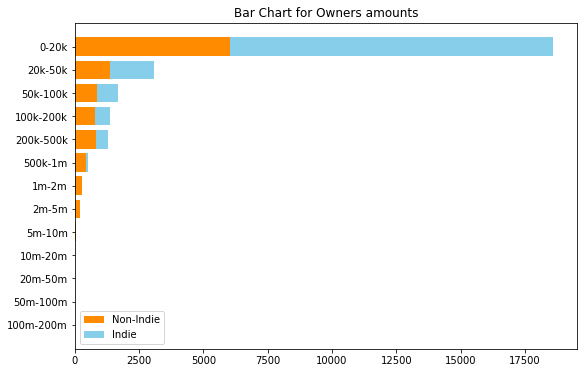

In [21]:
# owner

owners_counts = df.groupby(['owners', 'Indie']).size().unstack(fill_value=0)
# Sum the counts for each owner and sort the DataFrame by the total count in descending order
owners_counts['Total'] = owners_counts.sum(axis=1)
owners_counts = owners_counts.sort_values(by='Total', ascending=True).drop('Total', axis=1)

# Plot a bar chart
plt.figure(figsize=(9, 6))

indie_labels = ['Non-Indie', 'Indie']

plt.barh(owners_counts.index, owners_counts[0], color='darkorange', label=indie_labels[0])
plt.barh(owners_counts.index, owners_counts[1], color='skyblue', left=owners_counts[0], label=indie_labels[1])

# plt.barh(owners_counts['owners'], owners_counts['Count'], color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Bar Chart for Owners amounts')

# Add legend
plt.legend()

# Show the plot
plt.show()


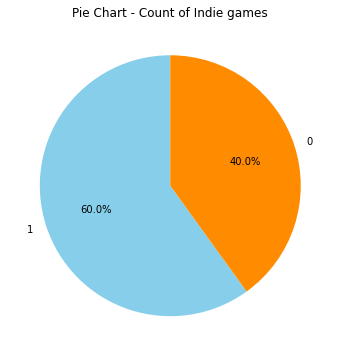

In [22]:
# Count the occurrences of each value in the column
indie_counts = df['Indie'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(indie_counts, labels=indie_counts.index, autopct='%1.1f%%', colors=['skyblue', 'darkorange'], startangle=90)

# Add title
plt.title('Pie Chart - Count of Indie games')

# Show the plot
plt.show()


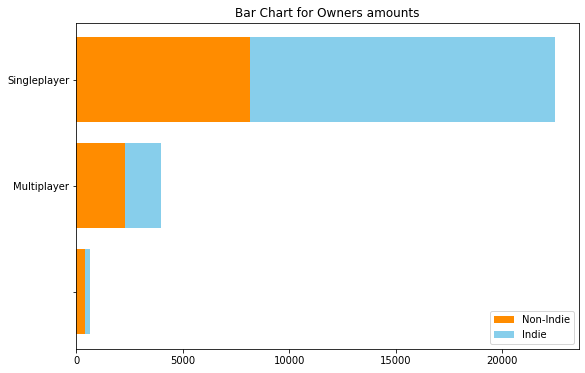

In [23]:
# style

style_counts = df.groupby(['style', 'Indie']).size().unstack(fill_value=0)
# Sum the counts for each owner and sort the DataFrame by the total count in descending order
style_counts['Total'] = style_counts.sum(axis=1)
style_counts = style_counts.sort_values(by='Total', ascending=True).drop('Total', axis=1)

# Plot a bar chart
plt.figure(figsize=(9, 6))

indie_labels = ['Non-Indie', 'Indie']

plt.barh(style_counts.index, style_counts[0], color='darkorange', label=indie_labels[0])
plt.barh(style_counts.index, style_counts[1], color='skyblue', left=style_counts[0], label=indie_labels[1])

# plt.barh(owners_counts['owners'], owners_counts['Count'], color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Bar Chart for Owners amounts')

# Add legend
plt.legend()

# Show the plot
plt.show()

,achievements,average_playtime,median_playtime,price,positive_rate_pct,positive_ratings,total_ratings,revenue
achievements,1.000000,0.014175,0.009957,-0.007996,-0.022506,0.006058,0.005813,0.003565
average_playtime,0.014175,1.000000,0.914900,0.049242,0.020349,0.157898,0.164463,0.152480
median_playtime,0.009957,0.914900,1.000000,0.036610,0.013172,0.035776,0.039437,0.056793
price,-0.007996,0.049242,0.036610,1.000000,0.076448,0.036110,0.040363,0.145538
positive_rate_pct,-0.022506,0.020349,0.013172,0.076448,1.000000,0.030300,0.025797,0.020945
positive_ratings,0.006058,0.157898,0.035776,0.036110,0.030300,1.000000,0.992340,0.315157
total_ratings,0.005813,0.164463,0.039437,0.040363,0.025797,0.992340,1.000000,0.401047
revenue,0.003565,0.152480,0.056793,0.145538,0.020945,0.315157,0.401047,1.000000


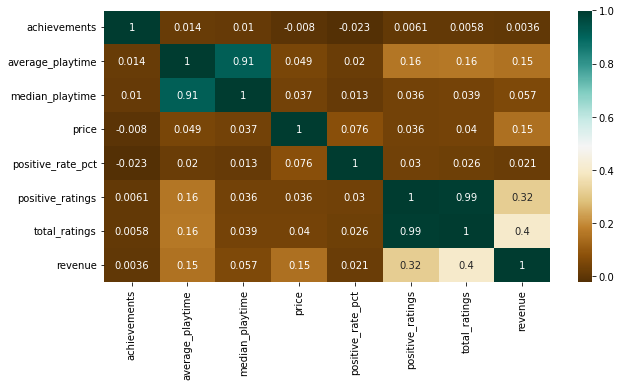

In [24]:
# Plot the scatter plot
temp = df[['achievements','average_playtime', 'median_playtime','price','positive_rate_pct','positive_ratings','total_ratings','revenue']]
plt.figure(figsize=(10,5))
c= temp.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c


In [25]:
df

,name,english,required_age,achievements,positive_ratings,average_playtime,median_playtime,owners,price,year,style,Indie,positive_rate_pct,total_ratings,revenue
0,Counter-Strike,1,0,0,124534,17612,317,10m-20m,7.19,2000,Multiplayer,0,0.97,127873,919406.87
1,Team Fortress Classic,1,0,0,3318,277,62,5m-10m,3.99,1999,Multiplayer,0,0.84,3951,15764.49
2,Day of Defeat,1,0,0,3416,187,34,5m-10m,3.99,2003,Multiplayer,0,0.90,3814,15217.86
3,Deathmatch Classic,1,0,0,1273,258,184,5m-10m,3.99,2001,Multiplayer,0,0.83,1540,6144.60
4,Half-Life: Opposing Force,1,0,0,5250,624,415,5m-10m,3.99,1999,Multiplayer,0,0.95,5538,22096.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,Room of Pandora,1,0,7,3,0,0,0-20k,2.09,2019,Singleplayer,1,1.00,3,6.27
27071,Cyber Gun,1,0,0,8,0,0,0-20k,1.69,2019,Singleplayer,1,0.89,9,15.21
27072,Super Star Blast,1,0,24,0,0,0,0-20k,3.99,2019,Multiplayer,1,0.00,1,3.99
27073,New Yankee 7: Deer Hunters,1,0,0,2,0,0,0-20k,5.19,2019,Singleplayer,1,1.00,2,10.38
